<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-1/blob/main/5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_0405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch4. 1~2

pg. 183-210


# [Chapter4] 분류

## 4-1. 분류(Classification)의 개요

지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식




- 분류

  - 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성
  - 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값 예측

  - 구현할 수 있는 알고리즘
        나이브 베이즈, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 최소 근접 알고리즘, 신경망, *앙상블*

- 앙상블
  - 정형 데이터 영역에서 매우 높은 예측 성능을 보임
  - 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태
  - 일반적으로 **배깅**(Bagging), **부스팅**(Boosting) 방식으로 나뉨

- 배깅
  - Random Forest : 배깅의 대표 방식, 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성

- 부스팅
  - 근래의 앙상블 방법은 부스팅 방식으로 지속해서 발전 중임
  - Gradient Boosting : 뛰어난 예측 성능을 가지고 있지만 수행 시간이 너무 오래 걸리는 단점
  - XgBoost, LightGBM 등 기존 그래디언트 부스팅의 예측 성능은 발전시키면서도 수행 시간을 단축시킨 알고리즘 등장

- 결정 트리
  - 일반적으로 앙상블의 기본 알고리즘으로 사용함
  - 데이터의 스케일링, 정규화 등 사전 가공의 영향이 매우 적음
  - 과적합으로 인해 예측 성능이 저하될 수 있다는 단점
  
  -> 앙상블에서는 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대해 가중치를 계속 업데이트하며 예측 성능 향상
  -> 결정 트리가 좋은 약한 학습기가 됨

## 4-2. 결정 트리
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만듦

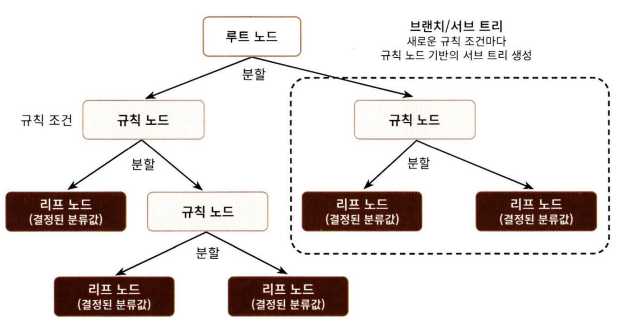

- 규칙 노드: 규칙 조건
- 리프 노드 : 결정된 클래스 값
- 서브 트리 : 새로윤 규칙 조건마다 생성

- 많은 규칙이 있으면 분류를 결정하는 방식이 복잡해져서 *과적합*으로 이어지기 쉬움

  -> 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음

- 가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함

  -> 트리를 어떻게 분할(split)할 것인지가 중요, 최대한 균일한 데이터 세트를 구성할 수 있도록 분할해야함

**정보 균일도를 측정하는 방법**
- 정보 이득 지수
  - 엔트로피 개념을 기반으로 함 (엔트로피 : 데이터 집합의 혼잡도를 의미, 서로 다른 값이 섞여 있으면 엔트로피가 높아지고 같은 값이 섞여 있으면 낮아짐)
  - 정보 이득 지수 = 1 - 엔트로피 지수
  - 결정 트리는 정보 이득이 **높은** 속성을 기준으로 분할
- 지니 계수
  - 0이 가장 평등, 1로 갈수록 불평등
  - 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석
  - 지니 계수가 **낮은** 속성을 기준으로 분할

- 사이킷런에서 DecisionTreeClassifier는 기본적으로 지니계수 사용
- 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드를 반복적으로 분할, 모든 데이터가 특정 분류에 속하면 분할 멈추고 분류를 결정함

### **결정 트리 모델의 특징**

- 장점
  - 균일도를 기반으로 하기 때문에 알고리즘이 쉽고 직관적임
  - 특별한 경우를 제외하고 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음
- 단점
  - 과적합으로 정확도가 떨어짐
  - 트리의 크기를 사전에 제한하는 튜닝 필요

### **결정 트리 파라미터**

DecisionTreeClassifier : 분류를 위한 클래스

DecisionTreeRegressor : 회귀를 위한 클래스

CART(Classification And Regression Tree) : 사이킷런의 결정트리 구현 알고리즘, 분류/회귀 모두 사용 가능

  - min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수
  - min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수
  - max_features : 최대 피처 개수
  - max_depth : 트리의 최대 깊이 규정
  - max_leaf_nodes : 말단 노드의 최대 개수

### **결정 트리 모델의 시각화**

Graphviz : 결정 트리 알고리즘이 어떤 규칙을 가지고 트리를 생성하는지 시각적으로 보여주는 패키지


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- export_graphviz() : 인자로 학습이 완료된 estimator, output 파일명, 결정 클래스의 명칭, 피처의 명칭 입력

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

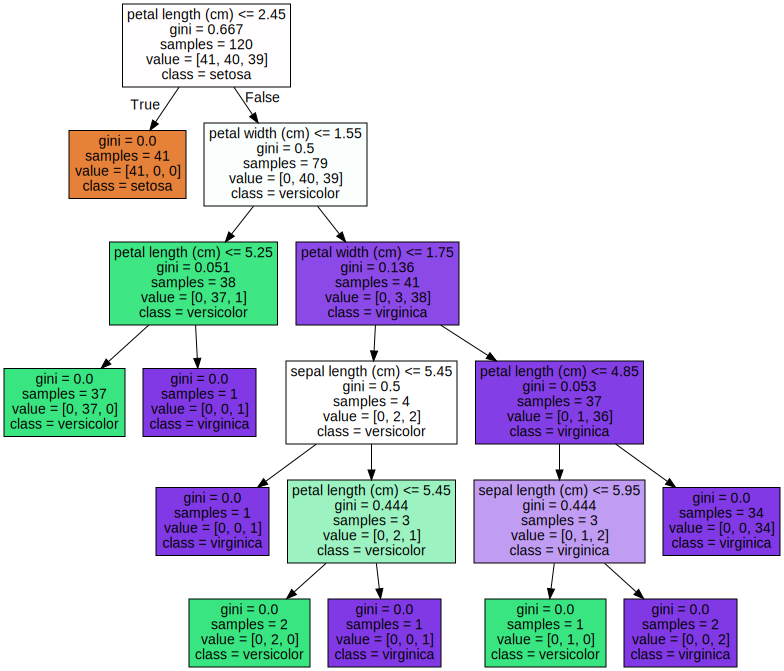

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- 리프 노드 : 더 이상 자식 노드가 없는 노드, 최종 클래스 값이 결정되는 노드
- 브랜치 노드 : 자식 노드가 있는 노드, 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있음

- gini : value=[]로 주어진 데이터 분포에서의 지니 계수
- samples : 현 규칙에 해당하는 데이터 건수
- value=[] : 클래스 값 기반의 데이터 건수

하이퍼 파라미터 변경에 따른 트리의 변화
- max_depth : 결정 트리의 최대 트리 깊이를 제어
- min_samples_split : 파라미터값보다 샘플값이 작으면, 서로 다른 클래스값이 있어도 분할하지 않음
- min_samples_leaf : 파라미터 값보다 샘플값이 작으면 리프 노드가 될 수 있으므로, 규칙 조건이 완화됨


Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

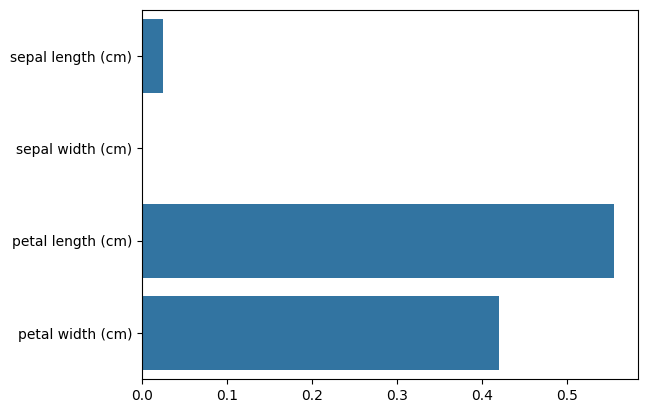

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

- feature_importances_ : 피처의 중요도를 ndarray 형태로 반환, 값이 높을수록 중요도가 높음
- 그래프에서 petal_length가 피처 중요도가 가장 높음

### **결정 트리 과적합(Overfitting)**

- make_classification() : 분류를 위한 테스트용 데이터를 쉽게 만들어주는 함수, 피처 데이터와 클래스 레이블 데이터 반환

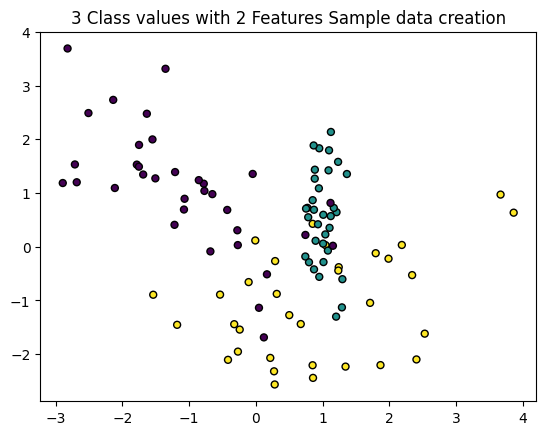

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [ ]:
## 부록 소스코드
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

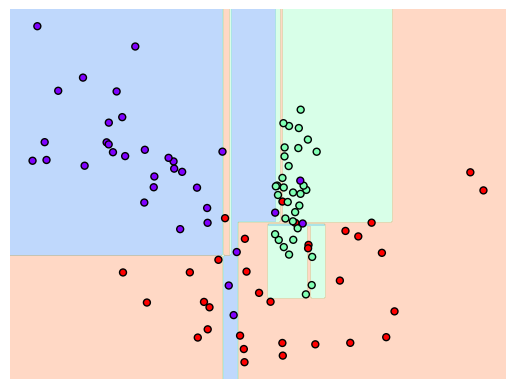

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

↑ 하이퍼 파라미터 설정을 기본으로 해서 분류

- 이상치 데이터까지 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 매우 많음

- 복잡한 모델은 학습 데이터 세트와 약간만 다른 형태의 데이터 세트를 예측해도 정확도가 떨어짐

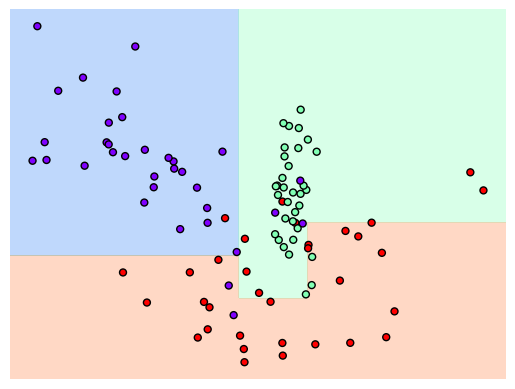

In [ ]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### **결정 트리 실습 - 사용자 행동 인식 데이터 세트**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


중복된 피처명 확인
- 총 42개의 피처명 중복

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                            if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명을 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/train/X_train.txt', sep='\s+',
                              names = feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/test/X_test.txt', sep='\s+',
                              names = feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/train/y_train.txt', sep='\s+',
                              header = None, names = ['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/human_activity/test/y_test.txt', sep='\s+',
                              header = None, names = ['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())


결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


GridSearchCV를 이용해 max_depth(결정 트리의 깊이) 값을 변화시키면서 예측 성능 확인

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 16}


- cv_results_ : GridSearchCV 객체에서 CV세트에 하이퍼 파라미터를 순차적으로 입력했을 때 성능 수치를 가지고 있음

In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [ ]:
max_depths = [ 6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [ ]:
params = {
    'max_depth' : [ 8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


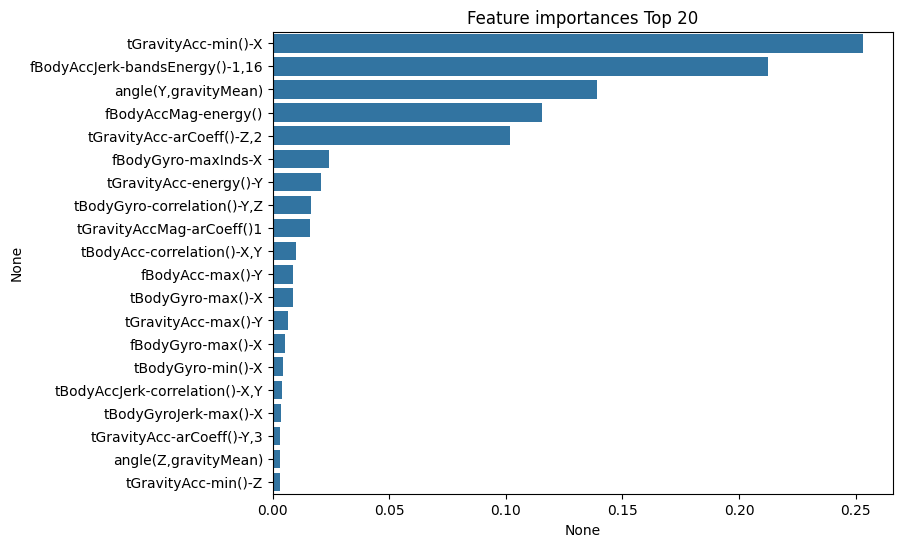

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()